In [1]:
#import all the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


#### Data science lifecyle:

1. Business understanding
2. Data Collection
3. Data Preparation
4. EDA
5. Data Modeling
6. Model Evaluation
7. Model Deployment



#### Steps involved in EDA

1. Imputation of missing values-> Replacing with mean, median or mode based on the situation.
2. Outliers detections and Removal
3. Correlation coefficient heatmap- checking how two variables are correlated. A value above 0.85 is said to be highly correlated.
4. Checking distribution of data

In [5]:
data=pd.read_excel('diabetes.xlsx')

In [17]:
data.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
data.shape

(768, 9)

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
#checking for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

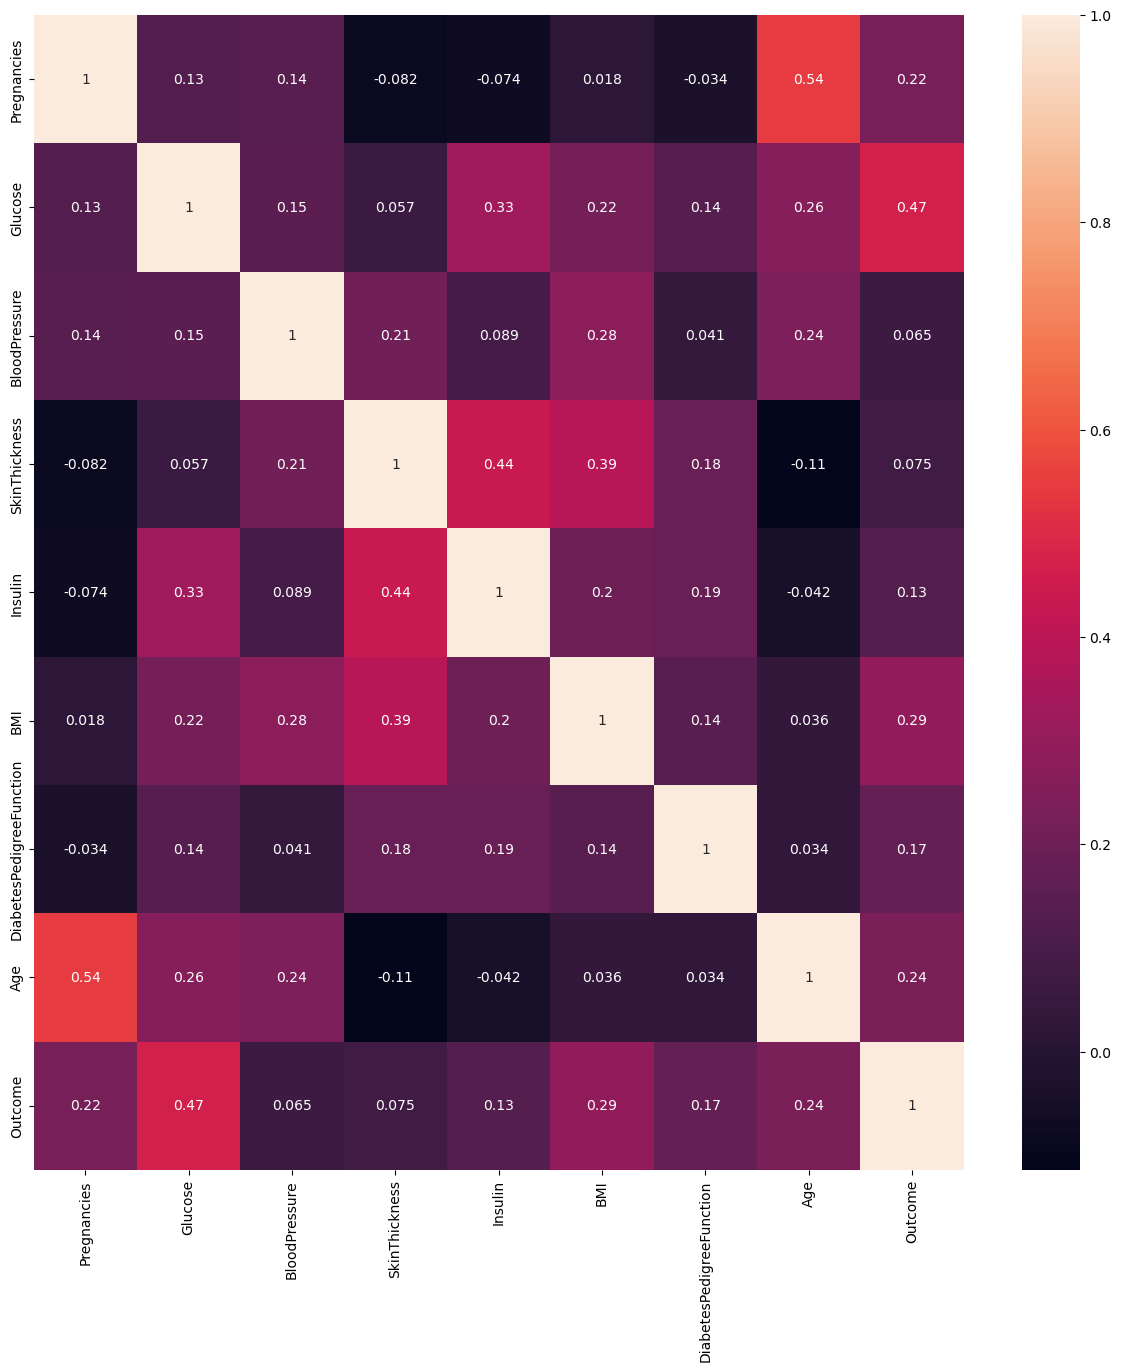

In [15]:
#correlation coefficient heatmap
plt.figure(figsize=(15,15))
ax=sns.heatmap(data.corr(),annot=True)
plt.savefig('Correlation coefficient.jpg')
plt.show()

#### no relation is highly correlated as seen from heatmap

<AxesSubplot:>

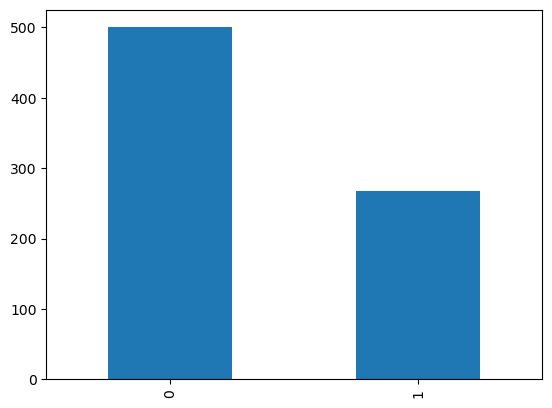

In [16]:
data['Outcome'].value_counts().plot(kind='bar')

### 0 is way higher than 1

### some inferences from the data

 Though data doesn't have missing values but BP, Skin Thickness have some values that are equal to zero

C:\Users\Vikas Velmurugan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

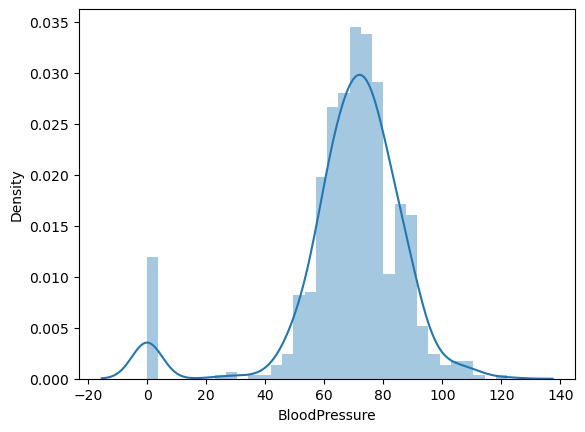

In [18]:
sns.distplot(data['BloodPressure'])

C:\Users\Vikas Velmurugan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

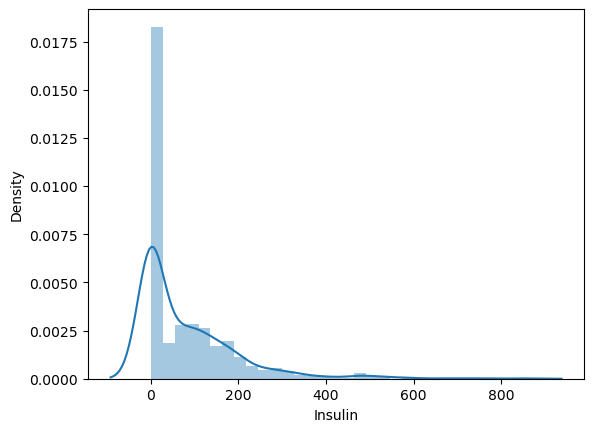

In [19]:
sns.distplot(data['Insulin'])

#### imputation of insulin wrt median(skewed distribution)


In [20]:
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())

C:\Users\Vikas Velmurugan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

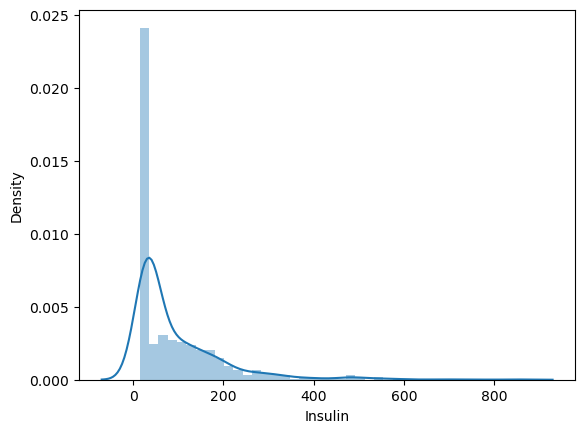

In [22]:
sns.distplot(data['Insulin'])

In [23]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,94.652344,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,105.547598,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,30.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


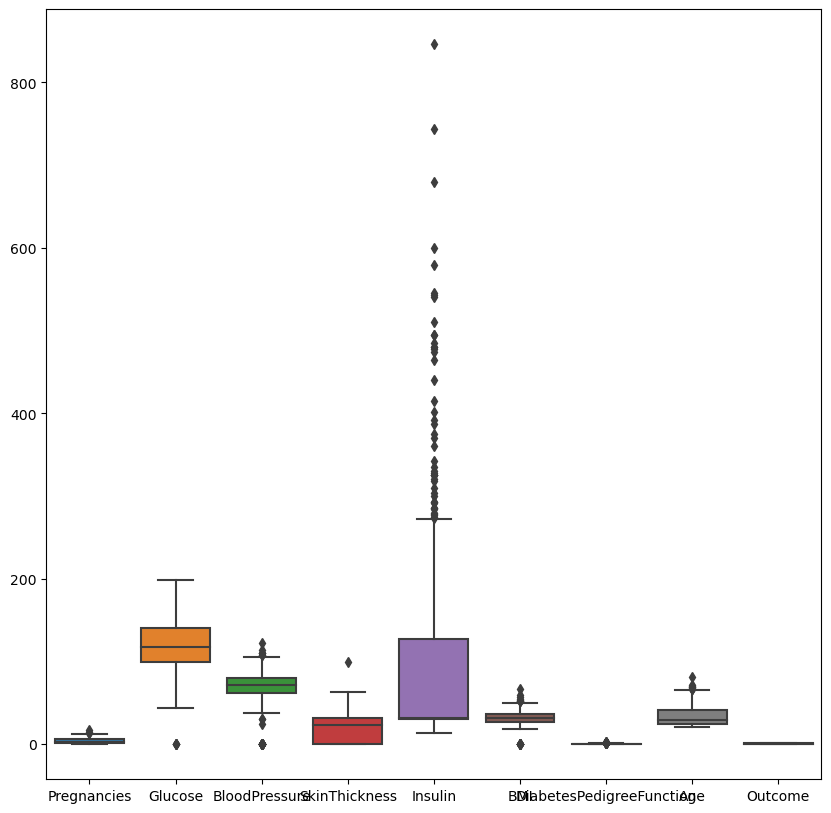

In [24]:
#outlier detection using boxplot

fig,ax=plt.subplots(figsize=(10,10))
sns.boxplot(data=data,ax=ax)
plt.savefig('Boxplot.jpg')

In [25]:
X=data.drop(columns='Outcome',axis=1)
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [27]:
y=data['Outcome']

### Normalization of input features


In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

In [29]:
X_scaled=pd.DataFrame(X_scaled)

In [30]:
X_scaled.describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,1.214306e-17,2.295979e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-7.646304e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.082010e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-6.010905e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,3.090444e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,7.123206e+00,4.455807e+00,5.883565e+00,4.063716e+00
